In [1]:
#EDA for Data analysis and Machine Learning part 3
# Auther Nawab khan 

import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [35]:
housing = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data1.tsv", sep='\t')
housing.head(950-960)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,2916,923227100,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,140000
2917,2917,923228130,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
2918,2918,923228180,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,87550
2919,2919,923228210,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,79500


In [15]:
housing["SalePrice"].describe().round()

count      2931.0
mean     180808.0
std       79876.0
min       12789.0
25%      129500.0
50%      160000.0
75%      213500.0
max      755000.0
Name: SalePrice, dtype: float64

AttributeError: 'tuple' object has no attribute 'skew'

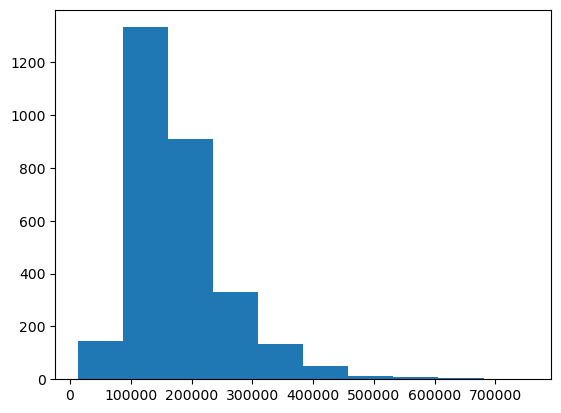

In [25]:
show = plt.hist(housing['SalePrice'])
show.skew()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_49736\3748835017.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sp_untransformed = sns.distplot(housing['Lot Area'])


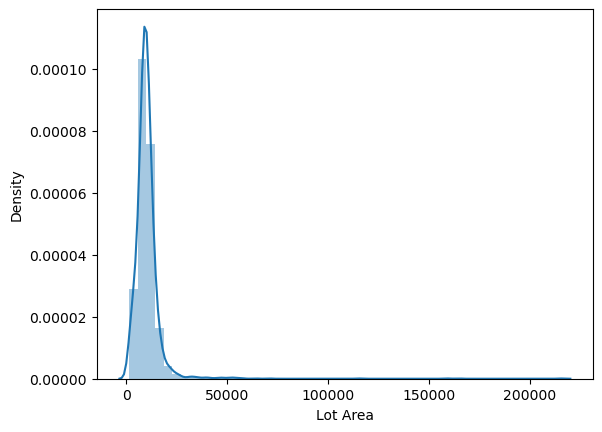

In [27]:
sp_untransformed = sns.distplot(housing['Lot Area'])

In [29]:
print("Skewness: %f" % housing['SalePrice'].skew())

Skewness: 1.743222


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Lot_Area_Stats
957,957,916176125,20,RL,150.0,215245,Pave,NaN,IR3,Low,...,NaN,NaN,NaN,0,6,2009,WD,Normal,375000,26.002051


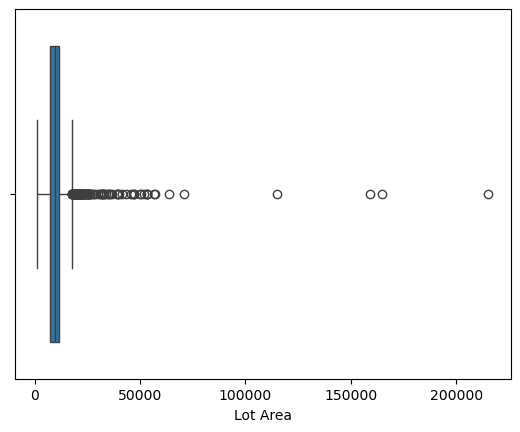

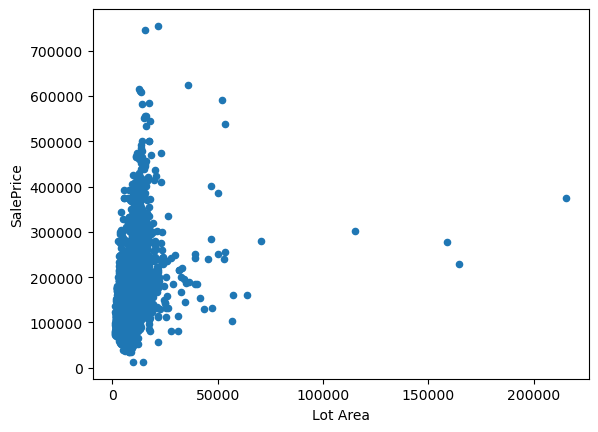

In [31]:
sns.boxplot(x=housing['Lot Area'])
price_lot = housing.plot.scatter(x='Lot Area', y='SalePrice')   
housing['Lot_Area_Stats'] = stats.zscore(housing['Lot Area'])
housing[['Lot Area','Lot_Area_Stats']].describe().round(3)
housing.sort_values(by = 'Lot Area', ascending = False)[:1]
#lot_area_rem = housing.drop(housing.index[[957]])

In [53]:
housing.sort_values(by = 'Order')[950:960]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
950,950,914474070,60,RL,71.0,12209,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
951,951,914475010,85,RL,75.0,9750,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,156450
952,952,914475030,85,RL,72.0,9360,Pave,NaN,Reg,Bnk,...,0,NaN,GdWo,NaN,0,11,2009,WD,Normal,173000
953,953,914476020,90,RL,75.0,10125,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2009,COD,Normal,126000
954,954,914476380,80,RL,NaN,9947,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,173000
955,955,914476430,20,RL,82.0,11070,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,COD,Abnorml,152000
956,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
957,957,916176125,20,RL,150.0,215245,Pave,NaN,IR3,Low,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
958,958,916380070,20,RL,89.0,12898,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500
959,959,916382010,60,RL,83.0,13159,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,224500
